In [47]:

from sympy import *
import numpy as np
from matplotlib import pyplot as plt


class Firm:
    def __init__(self, fix_cost, marginal_cost, q):
        self.fix_cost = fix_cost
        self.marginal_cost = marginal_cost
        self.q = symbols(q)

    def cost(self):
        cost_func = self.fix_cost + self.marginal_cost * self.q
        return cost_func

class Cournot:
    def __init__(self, firm: list, p_intercept, p_slope):
        self.firm = firm
        self.p_intercept = p_intercept
        self.p_slope = p_slope
        self.P_inverse = self.p_intercept + self.p_slope * (self.firm[0].q + self.firm[1].q)
        self.pf = []
        self.reaction_list = []

    def profit(self):
        for i in range(len(self.firm)):
            pi = self.P_inverse * self.firm[i].q - self.firm[i].cost()
            self.pf.append(pi)
        return self.pf

    def reaction_func(self):
        for i in range(len(self.firm)):
            foc = diff(self.pf[i], self.firm[i].q)
            self.reaction_list.append(foc)
        return self.reaction_list

    def equilibrium(self):
        solution = solve((self.reaction_list[0], self.reaction_list[1]), (self.firm[0].q, self.firm[1].q))
        return solution

    def figure(self):
        q1_vals = np.linspace(0, 5000, 100)
        q2_vals = np.linspace(0, 5000, 100)

        Q1, Q2 = np.meshgrid(q1_vals, q2_vals)

        # Evaluate the first equation in self.foc_list
        FOC1 = lambdify((self.firm[0].q, self.firm[1].q), self.reaction_list[0], 'numpy')
        Z1 = FOC1(Q1, Q2)

        # Evaluate the second equation in self.foc_list
        FOC2 = lambdify((self.firm[0].q, self.firm[1].q), self.reaction_list[1], 'numpy')
        Z2 = FOC2(Q1, Q2)

        # Plot contours for the two equations
        plt.contour(Q1, Q2, Z1, levels=[0], colors='r', label='reaction1')
        plt.contour(Q1, Q2, Z2, levels=[0], colors='b', label='reaction2')

        plt.xlabel('Firm 1 Quantity')
        plt.ylabel('Firm 2 Quantity')
        plt.legend(title=("reaction1", "reaction2"))
        plt.show()
      
      





/var/folders/vg/1v85gpx17590y_h79gyxdjr00000gn/T/ipykernel_12652/2832419433.py:56: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(Q1, Q2, Z1, levels=[0], colors='r', label='reaction1')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-5*q1 - 5*q2 + 10000
[-10*q1 - 5*q2 + 9000, -5*q1 - 10*q2 + 8000]
{q1: 2000/3, q2: 1400/3}


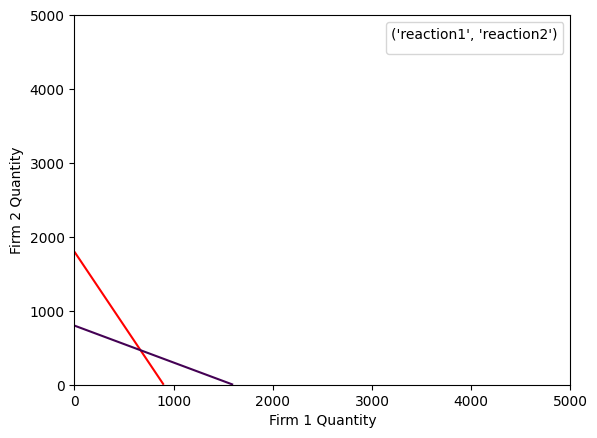

In [48]:
apple = Firm(2000, 1000, "q1")  

samsung = Firm(800, 2000, "q2")

cournot = Cournot([apple, samsung], 10000, -5)
cournot.profit()
# print(cournot.pf)
print(cournot.P_inverse)

print(cournot.reaction_func())

print(cournot.equilibrium())

cournot.figure()